卷積神經網路(Convolutional neural network, CNN)

In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data

(x_train, y_train), (x_test, y_test) = load_data()


In [0]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = [
    "airplane",									
    "automobile",									
    "bird",										
    "cat",										
    "deer",										
    "dog",									
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

horse


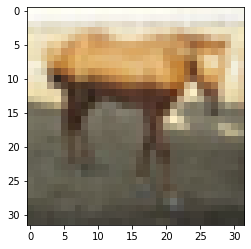

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

layers = [
    # 27(1 filter) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers=layers)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
from tensorflow.keras. losses import SparseCategoricalCrossentropy

model.compile(loss=SparseCategoricalCrossentropy(), 
              optimizer="adam",
              metrics=["accuracy"])


In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255


In [0]:
# 存模型: model.save("xxx.h5")
# 讀取模型: 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)


Epoch 1/100
225/225 - 8s - loss: 1.6344 - accuracy: 0.4016 - val_loss: 1.2533 - val_accuracy: 0.5444
Epoch 2/100
225/225 - 8s - loss: 1.1847 - accuracy: 0.5753 - val_loss: 1.0039 - val_accuracy: 0.6494
Epoch 3/100
225/225 - 8s - loss: 0.9746 - accuracy: 0.6588 - val_loss: 0.8736 - val_accuracy: 0.6938
Epoch 4/100
225/225 - 8s - loss: 0.8434 - accuracy: 0.7054 - val_loss: 0.7936 - val_accuracy: 0.7184
Epoch 5/100
225/225 - 8s - loss: 0.7465 - accuracy: 0.7384 - val_loss: 0.7404 - val_accuracy: 0.7390
Epoch 6/100
225/225 - 8s - loss: 0.6726 - accuracy: 0.7636 - val_loss: 0.6866 - val_accuracy: 0.7654
Epoch 7/100
225/225 - 8s - loss: 0.6123 - accuracy: 0.7856 - val_loss: 0.6926 - val_accuracy: 0.7616
Epoch 8/100
225/225 - 8s - loss: 0.5387 - accuracy: 0.8099 - val_loss: 0.6834 - val_accuracy: 0.7664
Epoch 9/100
225/225 - 8s - loss: 0.4756 - accuracy: 0.8317 - val_loss: 0.6730 - val_accuracy: 0.7688
Epoch 10/100
225/225 - 8s - loss: 0.4266 - accuracy: 0.8490 - val_loss: 0.7864 - val_accura

In [0]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7074 - accuracy: 0.7584


[0.7074097394943237, 0.758400022983551]

In [0]:
pre = model.predict_classes(x_test_norm)
pre


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [0]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)


(10000,)
(10000, 1)
(10000,)


In [0]:
import pandas as pd
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test_reshape, pre)
c = ["{}(預測)".format(i) for i in trans]
i = ["{}(真實)".format(i) for i in trans]
pd.DataFrame(mat, columns=c, index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),806,11,51,29,11,4,7,8,42,31
automobile(真實),13,886,4,12,3,0,3,1,9,69
bird(真實),60,8,673,78,51,43,44,30,7,6
cat(真實),33,8,52,659,46,113,36,28,7,18
deer(真實),21,6,72,90,653,39,32,77,8,2
dog(真實),21,2,33,232,24,619,16,42,7,4
frog(真實),9,3,47,92,16,18,798,7,6,4
horse(真實),16,4,26,56,35,37,0,816,1,9
ship(真實),66,38,13,11,3,3,1,4,841,20
truck(真實),33,81,8,19,1,5,3,8,9,833


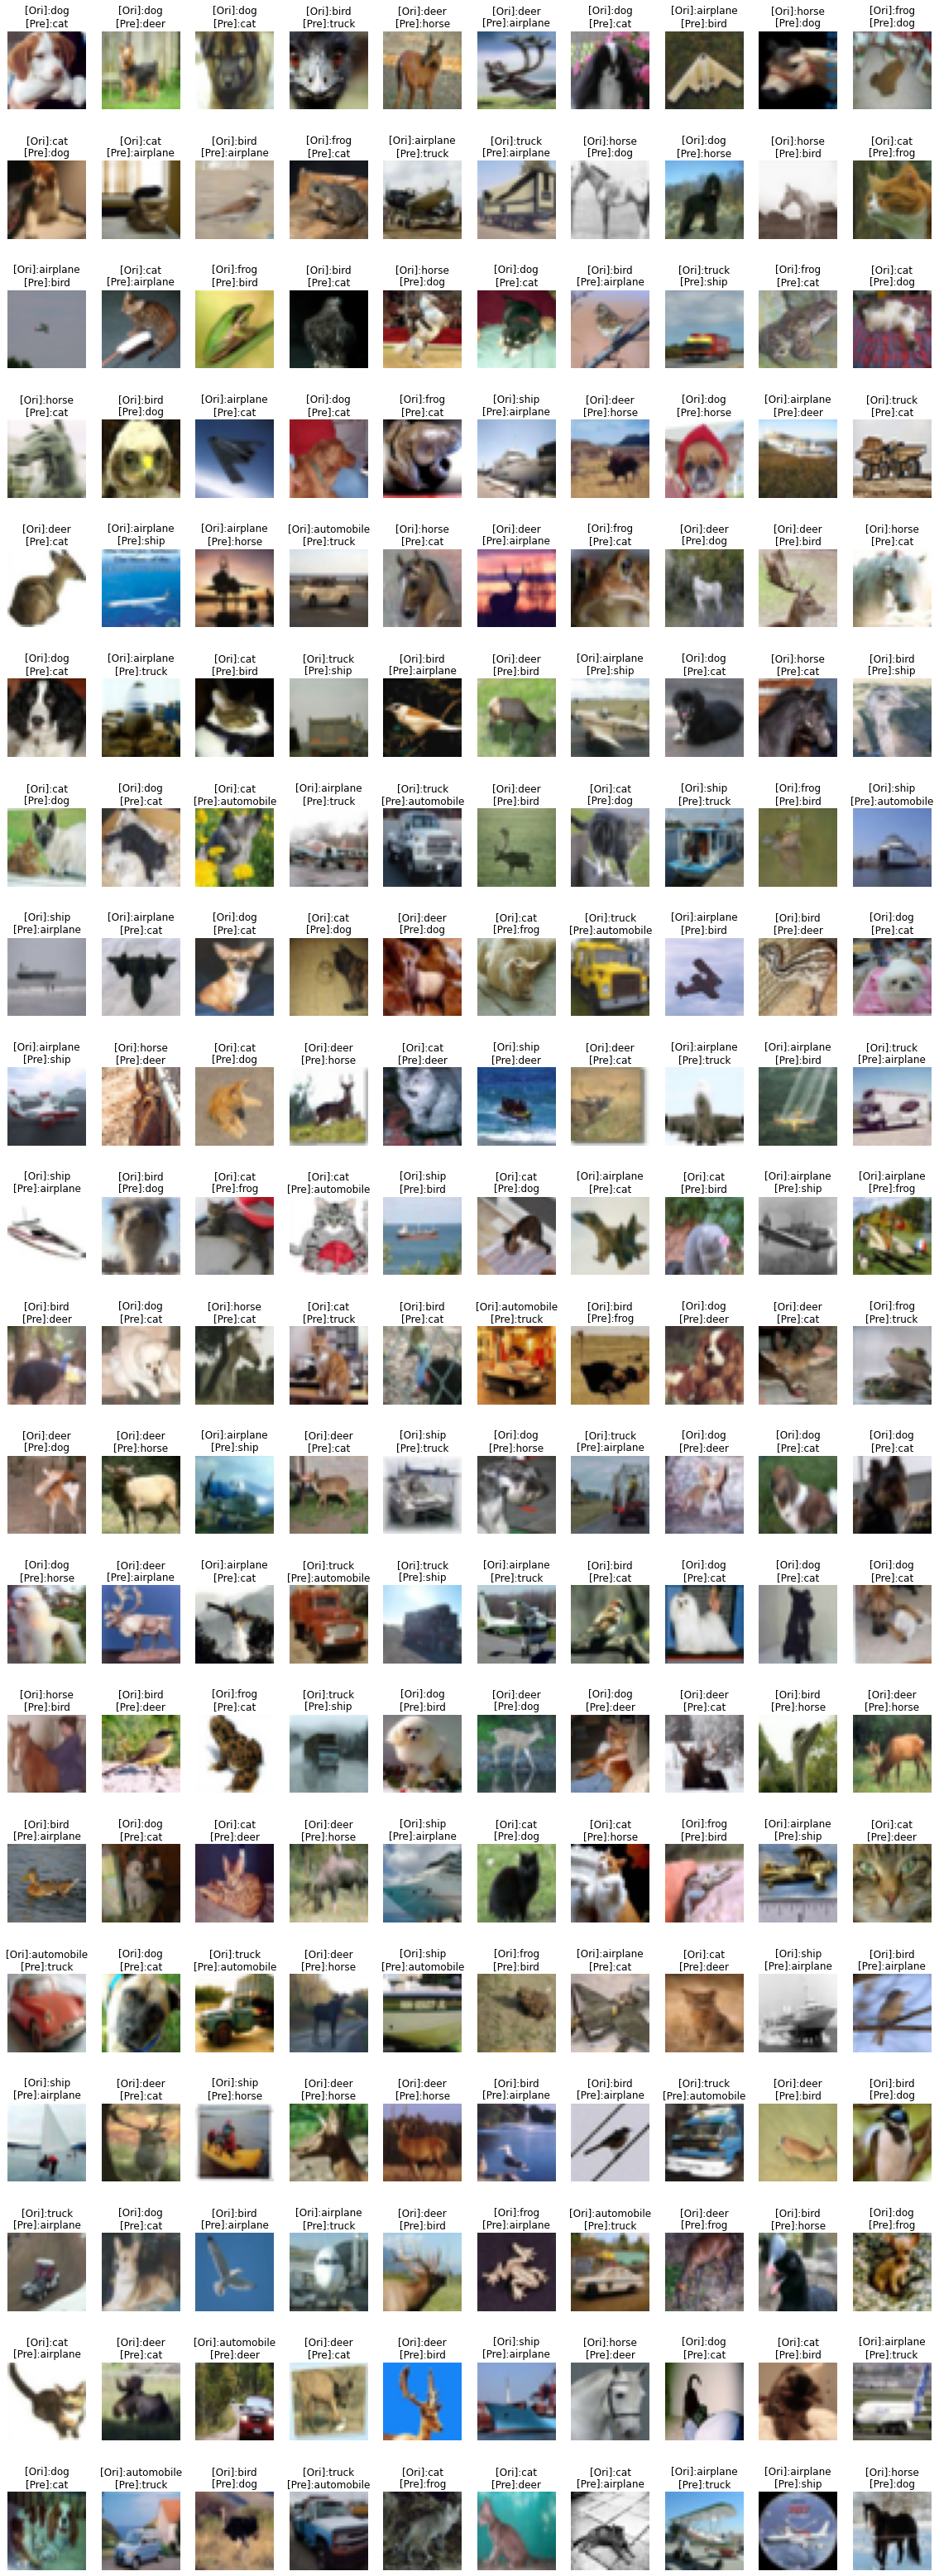

In [0]:
import numpy as np

# nonzero: 取出是True的index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test_reshape[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(20, 60))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[Pre]:{}".format(trans[false_answer[i]],
                                    trans[false_predict[i]])
    plt.title(t)
    plt.imshow(img)
  

輸入檔名:test.jpg
應該是: frog


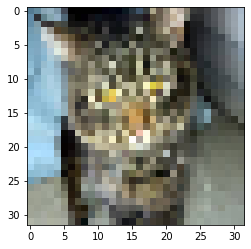

In [0]:
from tensorflow.keras.preprocessing.image import load_img

fn = input("輸入檔名:")
img = load_img(fn, target_size=(32, 32))
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(1, 32, 32, 3) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", trans[ans])
plt.imshow(img)


In [0]:
# 讀取model
from tensorflow.keras.models import load_model

loaded = load_model("cnn.h5") 
# 讀取完以後 1. predict 2. fit(不用compile)
loaded.evaluate(x_test_norm, y_test)
# 如果你想看h5 https://support.hdfgroup.org/products/java/release/download.html


313/313 [==============================] - 2s 6ms/step - loss: 0.7074 - accuracy: 0.7584


[0.7074097394943237, 0.758400022983551]